In [1]:
import numpy as np
import pandas as pd

**Installing Tensorflow**
- pip install Tensorflow --> in anaconda prompt
- pip install tensorflow --> in jupyter notebook

**Installing keras**
- pip install Keras --> in anaconda prompt
- !pip install --upgrade keras --> in jupyter notebook

In [2]:
#pip install tensorflow

In [3]:
#!pip install --upgrade keras

In [2]:
import tensorflow as tf
import keras

In [3]:
df = pd.read_excel('energy.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
X = df.drop(columns='PE')
y = df['PE']

In [6]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Part 2 - Buildiing the ANN**

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
def ann_model_regressor():
    # Initializing the ANN
    model=Sequential()

    # Adding the second hidden layer and the first hidden layer
    model.add(Dense(input_dim=4, units=6, activation='relu', kernel_initializer='uniform'))

    # Adding the seecond hidden layer
    # model.add(Dense(units=1, activation='relu', kernel_initializer='uniform'))

    # Adding the output layer
    model.add(Dense(units=1,activation='relu', kernel_initializer='uniform'))

    # Completing the ANN
    model.compile(optimizer='adam',loss='mean_squared_error')

    return model

In [10]:
def ann_model_regressor():
    model=Sequential()
    model.add(Dense(input_dim=4, units=6, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(units=1,activation='relu', kernel_initializer='uniform'))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [11]:
ann = ann_model_regressor()

In [12]:
import time
start_time = time.time()

# Training the ANN model on the training set
ann.fit(X_train, y_train, batch_size=32, epochs=100)

end_time = time.time()
print(f"Training took {end_time - start_time} seconds")

Epoch 1/100
240/240 [==============================] - 4s 4ms/step - loss: 205420.2656
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 185996.1875
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 128241.3203
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 60227.3320
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 26682.7129
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 18535.0723
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 14667.3604
Epoch 8/100
240/240 [==============================] - 1s 3ms/step - loss: 11169.4248
Epoch 9/100
240/240 [==============================] - 1s 3ms/step - loss: 7930.3496
Epoch 10/100
240/240 [==============================] - 1s 3ms/step - loss: 5157.9438
Epoch 11/100
240/240 [==============================] - 1s 3ms/step - loss: 3029.1624
Epoch 12/100
240/240 [==============================

In [13]:
# for gpu it takes 100.21479892730713 seconds
# for cpu it takes 39.28749942779541 seconds loss is 20.6485

In [14]:
# Predicting the results
ypred_train = ann.predict(X_train)
ypred_test = ann.predict(X_test)

60/60 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE for train data:',mean_squared_error(y_train,ypred_train))
print('MSE for test data:',mean_squared_error(y_test,ypred_test))

In [ ]:
from sklearn.metrics import r2_score
print('R2 for train data:', r2_score(y_train,ypred_train))


In [16]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip uninstall pydot graphviz

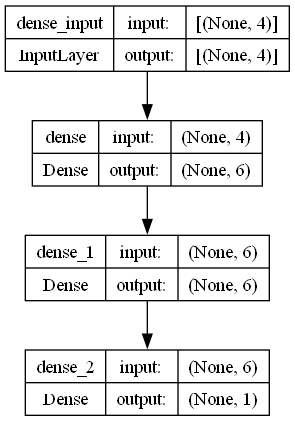

In [15]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your neural network
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


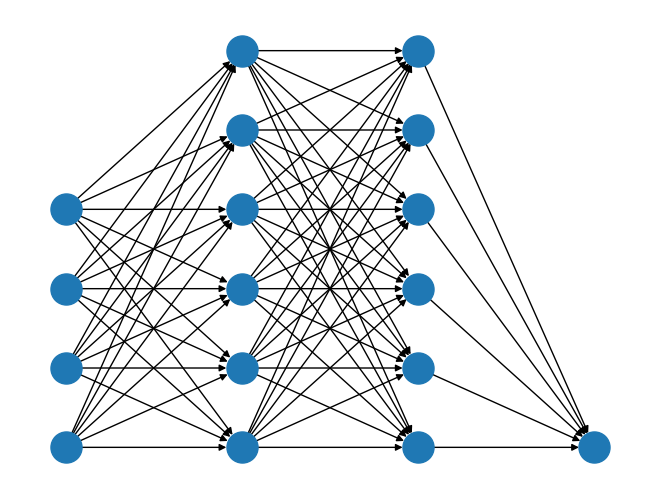

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_nn():
    G = nx.DiGraph()
    layers = {
        'Input': ['I1', 'I2', 'I3', 'I4'],
        'Hidden1': ['H1', 'H2', 'H3', 'H4', 'H5', 'H6'],
        'Hidden2': ['H7', 'H8', 'H9', 'H10', 'H11', 'H12'],
        'Output': ['O1']
    }

    pos = {}
    x = 0
    for layer, nodes in layers.items():
        for i, node in enumerate(nodes):
            pos[node] = (x, i)
        x += 1

    for layer1, layer2 in zip(layers.values(), list(layers.values())[1:]):
        for node1 in layer1:
            for node2 in layer2:
                G.add_edge(node1, node2)

    nx.draw(G, pos, with_labels=False, node_size=500)
    plt.show()

draw_nn()
